In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.6.2


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\H3118L23R\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incomplete5T355U\imdb_reviews-t…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\H3118L23R\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incomplete5T355U\imdb_reviews-t…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\H3118L23R\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incomplete5T355U\imdb_reviews-u…

Dataset imdb_reviews downloaded and prepared to C:\Users\H3118L23R\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    # tf.keras.layers.Conv1D(128, 5, activation='relu'),
#     tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                18816     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 546,881
Trainable params: 546,881
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 364s 925ms/step - loss: 0.5589 - accuracy: 0.6950 - val_loss: 0.4586 - val_accuracy: 0.8081
Epoch 2/10
391/391 [==============================] - 337s 863ms/step - loss: 0.3396 - accuracy: 0.8606 - val_loss: 0.6046 - val_accuracy: 0.7755
Epoch 3/10
391/391 [==============================] - 332s 849ms/step - loss: 0.2509 - accuracy: 0.9056 - val_loss: 0.3671 - val_accuracy: 0.8487
Epoch 4/10
391/391 [==============================] - 335s 856ms/step - loss: 0.1894 - accuracy: 0.9311 - val_loss: 0.3840 - val_accuracy: 0.8516
Epoch 5/10
391/391 [==============================] - 331s 847ms/step - loss: 0.1484 - accuracy: 0.9475 - val_loss: 0.4074 - val_accuracy: 0.8550
Epoch 6/10
391/391 [==============================] - 325s 831ms/step - loss: 0.1071 - accuracy: 0.9650 - val_loss: 0.4649 - val_accuracy: 0.8482
Epoch 7/10
391/391 [==============================] - 323s 825ms/step - loss: 0.0937 - accuracy: 0.9688 - val_loss: 0.5033 -

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

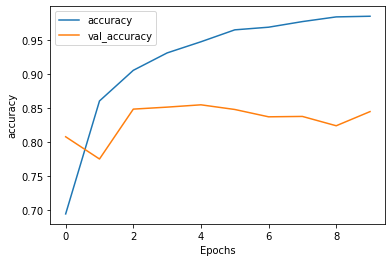

In [20]:
plot_graphs(history, 'accuracy')

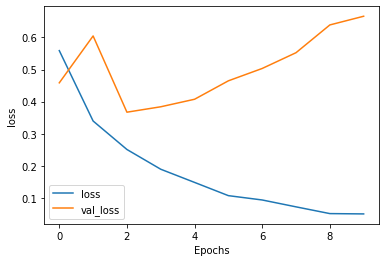

In [21]:
plot_graphs(history, 'loss')